# Intro to TensorFlow Millions of Points 

#### Load Dependencies

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Initialise Seeds

In [2]:
np.random.seed(42)
tf.set_random_seed(42)

#### Create a Dataset

In [3]:
xs = np.linspace(0., 8., 8000000)
ys = 0.25 * xs - 0.7 + np.random.normal(scale = 0.15, size = len(xs))

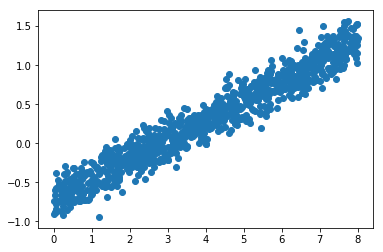

In [4]:
fig, ax = plt.subplots()
data_subset = pd.DataFrame(list(zip(xs, ys)), columns = ["x", "y"]).sample(1000)
_ = ax.scatter(data_subset.x, data_subset.y)

#### Define Variables

In [5]:
m = tf.Variable(-0.5) # one example
b = tf.Variable(1.0) # bias

In [6]:
batch_size = 8

#### Define Placeholders

In [7]:
xs_placeholder = tf.placeholder(tf.float32, [batch_size])
ys_placeholder = tf.placeholder(tf.float32, [batch_size])

#### Define Cost Function (sqrd error)

In [8]:
ys_model = m * xs_placeholder + b
total_error = tf.reduce_sum((ys_placeholder - ys_model) ** 2)

#### Define Optimiser

In [9]:
optimizer_op = tf.train.GradientDescentOptimizer(learning_rate = 0.001).minimize(total_error)

#### Define Initialiser

In [10]:
initializer_op = tf.global_variables_initializer()

#### Execute Session

In [11]:
with tf.Session() as session:
    session.run(initializer_op)
    
    n_epochs = 1000
    for i in range(n_epochs):
        random_indices = np.random.randint(len(xs), size = batch_size)
        feed = {
            xs_placeholder : xs[random_indices],
            ys_placeholder : ys[random_indices]
        }
        session.run(optimizer_op, feed_dict = feed)
    
    slope, intercept = session.run([m, b])

In [12]:
slope

0.25109151

In [13]:
intercept

-0.66868329

In [14]:
y_hat = slope + intercept * np.array(xs)

In [15]:
pd.DataFrame(list(zip(ys, y_hat)), columns = ["y", "y_hat"])

,y,y_hat
0,-0.625493,0.251092
1,-0.720739,0.251091
2,-0.602846,0.251090
3,-0.471545,0.251090
4,-0.735122,0.251089
5,-0.735119,0.251088
6,-0.463117,0.251087
7,-0.584883,0.251087
8,-0.770419,0.251086
9,-0.618614,0.251085


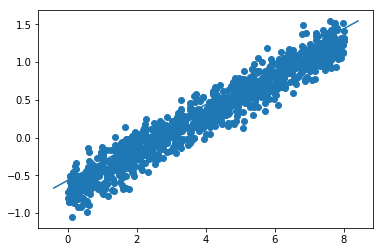

In [16]:
fig, ax = plt.subplots()
data_subset = pd.DataFrame(list(zip(xs, ys)), columns = ["x", "y"]).sample(1000)
ax.scatter(data_subset.x, data_subset.y)
x_min, x_max = ax.get_xlim()
y_min, y_max = intercept, intercept + slope * (x_max - x_min)
ax.plot([x_min, x_max], [y_min, y_max])